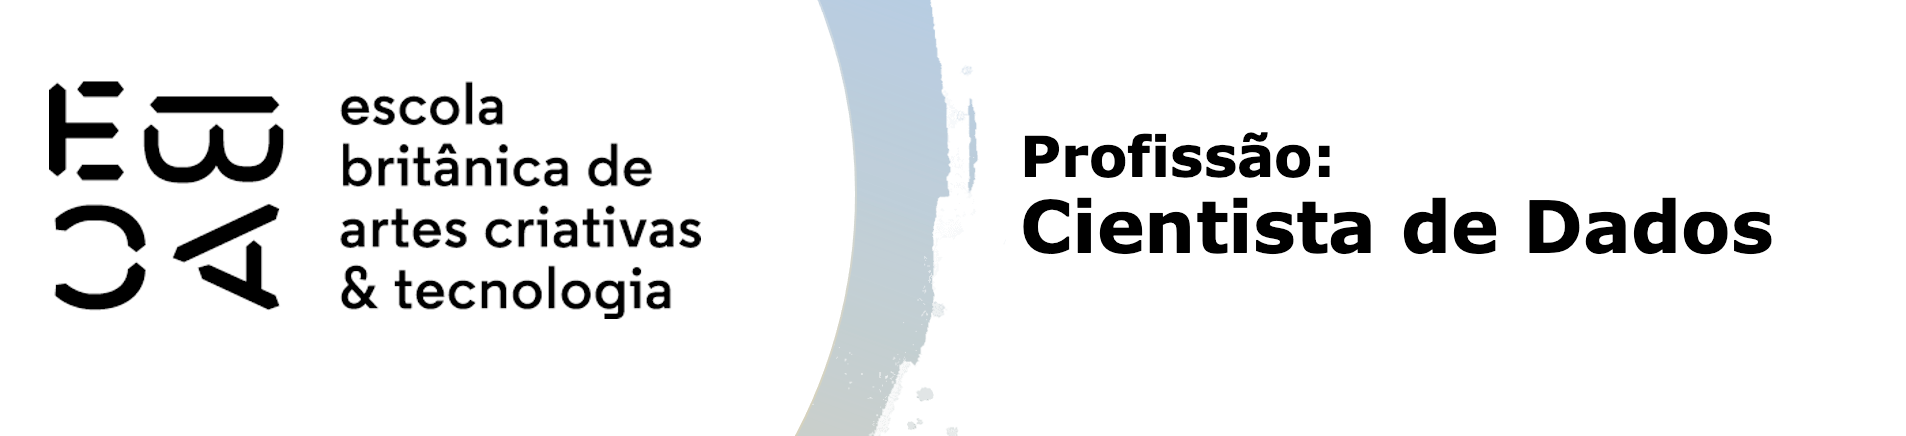

# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos. 

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [61]:
import numpy               as np
import pandas              as pd
import matplotlib.pyplot   as plt
import seaborn             as sns

from tqdm.notebook         import tqdm

from sklearn.preprocessing import StandardScaler
from sklearn.cluster       import KMeans
from sklearn.metrics       import silhouette_score

In [62]:
df = pd.read_csv('online_shoppers_intention.csv')

In [63]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [64]:
df.Revenue.value_counts(dropna=False)

Revenue
False    10422
True      1908
Name: count, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [66]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [67]:
df.nunique(axis=0)

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

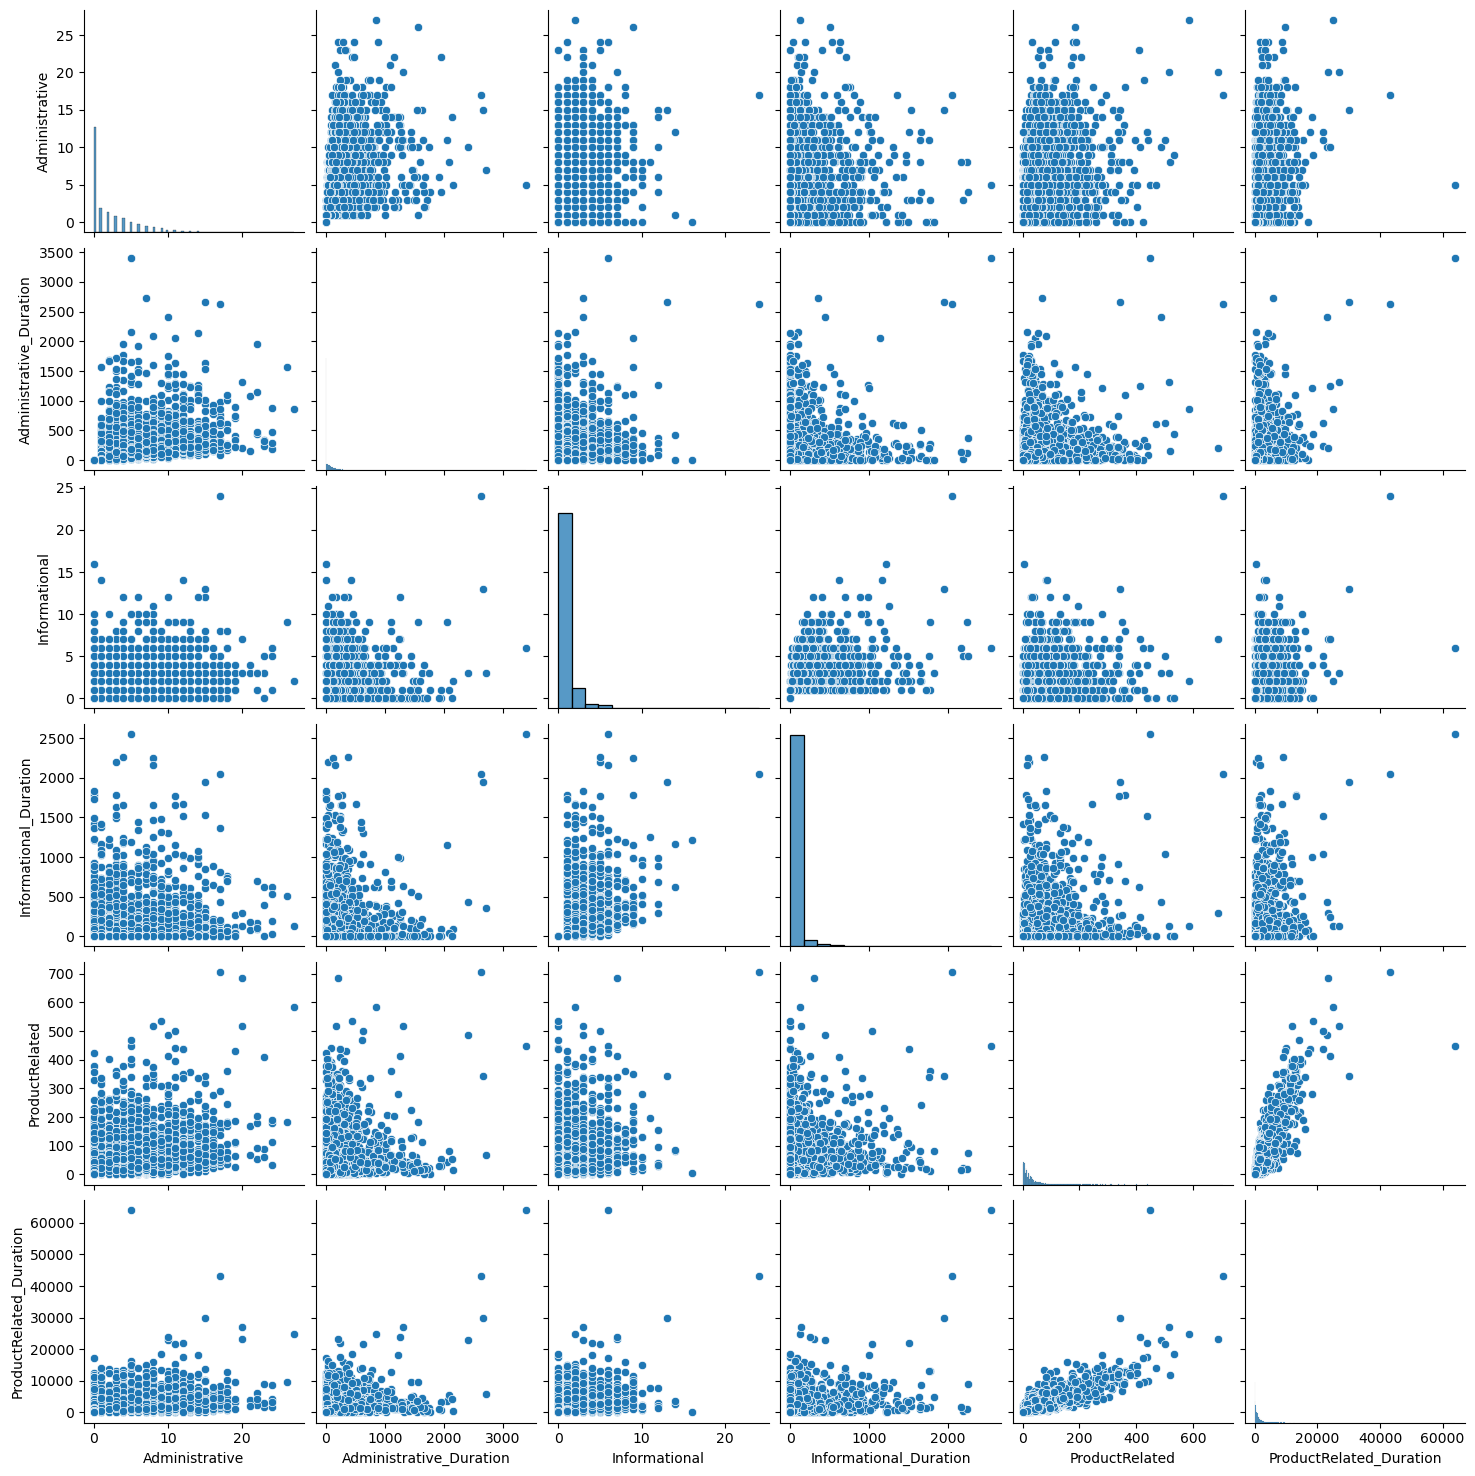

In [68]:
variaveis = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration']
sns.pairplot(df[variaveis])

## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

In [69]:
# Selecionando apenas as variaveis numericas:

df_quant = df.select_dtypes(include="number")
df_quant.head(1)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,1,1,1,1


In [70]:
df_padronizado = pd.DataFrame(StandardScaler().fit_transform(df[variaveis]), columns=df[variaveis].columns)
df_padronizado.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430


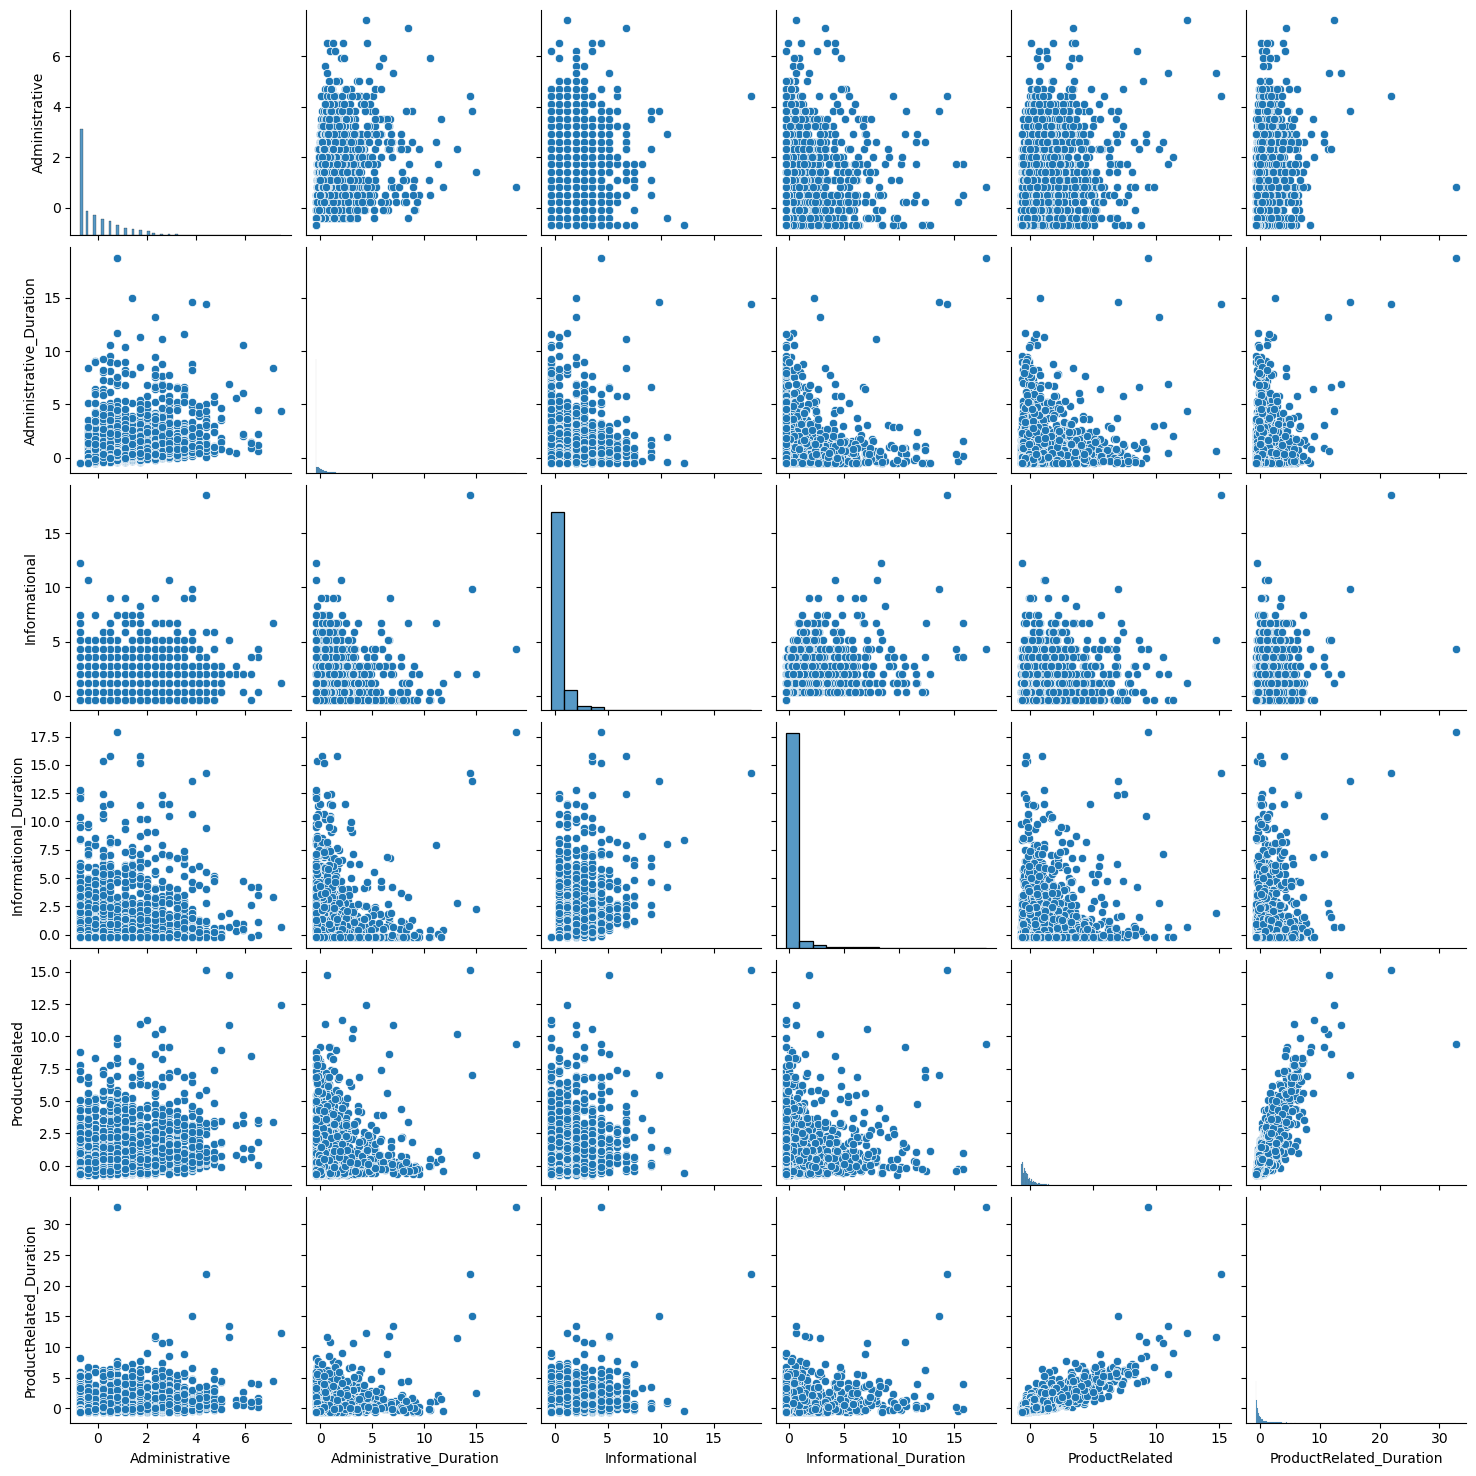

In [71]:
sns.pairplot(df_padronizado[variaveis])

In [72]:
# método do cotovelo:

SQD = []
K = range(1, 15)

for k in tqdm(K):
    km = KMeans(n_clusters = k)
    km = km.fit(df_padronizado[variaveis])
    SQD.append(km.inertia_)

  0%|          | 0/14 [00:00<?, ?it/s]

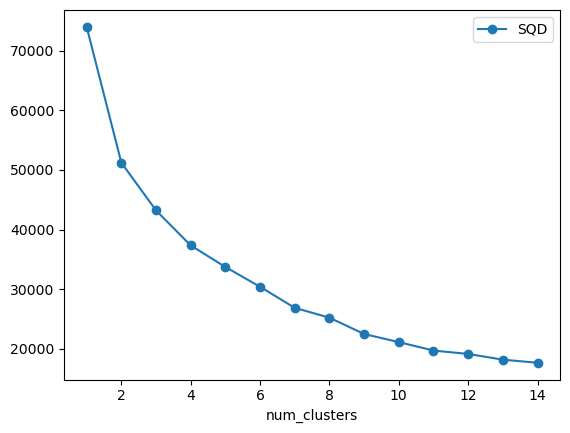

In [73]:
cot = pd.DataFrame({'num_clusters': list(range(1, len(SQD)+1)), 'SQD': SQD})
cot.plot(x = 'num_clusters', y = 'SQD', marker='o');

In [74]:
# Método da silhueta:

silhuetas = []
max_clusters = 10

for n_clusters in tqdm(range(2, max_clusters+1)):
    km = KMeans(n_clusters=n_clusters).fit(df_padronizado[variaveis])
    silhuetas.append(silhouette_score(df_padronizado[variaveis], km.labels_))
    nomes_grupos = ['grupo_' + str(g) for g in range(n_clusters)]
    df_padronizado['grupos_'+str(n_clusters)] = pd.Categorical.from_codes(km.labels_, categories = nomes_grupos)

  0%|          | 0/9 [00:00<?, ?it/s]

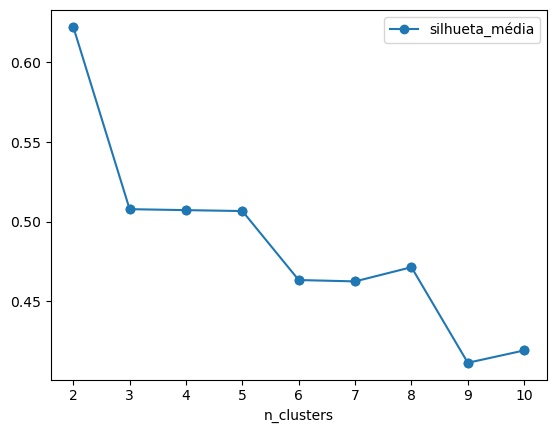

In [75]:
df_silhueta = pd.DataFrame({'n_clusters': list(range(2, max_clusters+1)), 'silhueta_média': silhuetas})

df_silhueta.plot.line(x = 'n_clusters', y = 'silhueta_média', marker='o')
plt.scatter(x = df_silhueta.n_clusters, y = df_silhueta.silhueta_média)

C:\Users\milla\AppData\Local\Temp\ipykernel_11816\604509464.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax.plot(df_padronizado.groupby(['grupos_4'])[variaveis].mean().apply(padrao), 'o ')


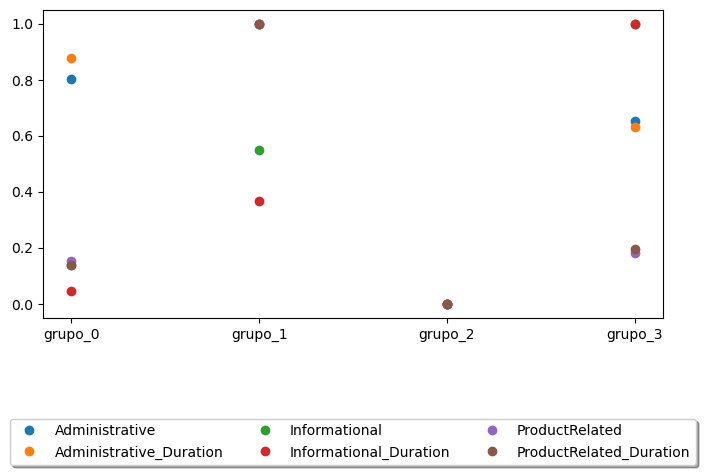

In [76]:
padrao = lambda x: (x - x.min())/(x.max() - x.min())

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(df_padronizado.groupby(['grupos_4'])[variaveis].mean().apply(padrao), 'o ')
ax.legend(variaveis, loc='lower center', bbox_to_anchor=(0.5, -.5),
          ncol=3, fancybox=True, shadow=True)

## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

CPU times: total: 15 s
Wall time: 15 s


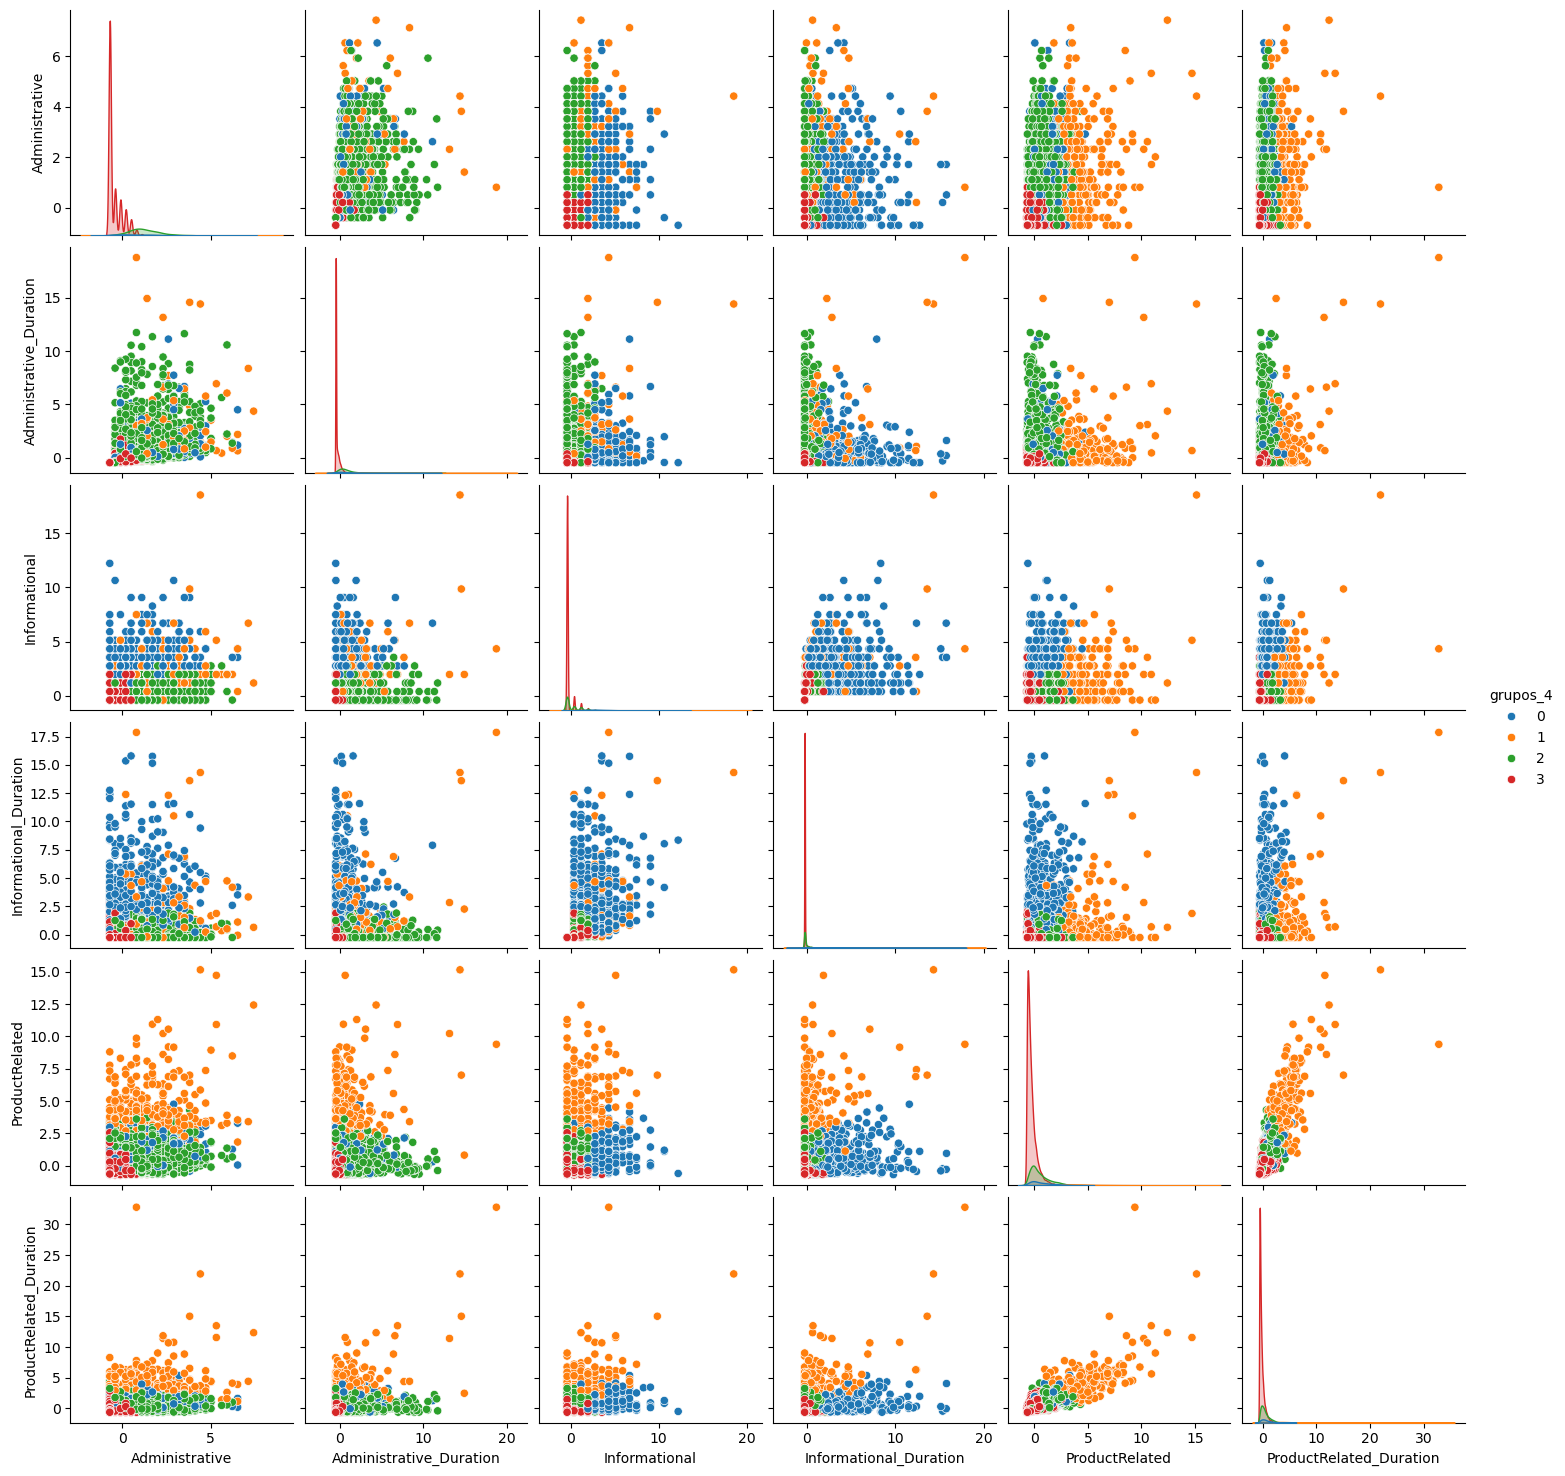

In [77]:
%%time
cluster_4 = KMeans(n_clusters=4)
cluster_4.fit_predict(df_padronizado[variaveis])

df_padronizado['grupos_4'] = pd.Categorical(cluster_4.labels_)

sns.pairplot(df_padronizado, hue='grupos_4')

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

<Axes: xlabel='BounceRates', ylabel='grupos_4'>

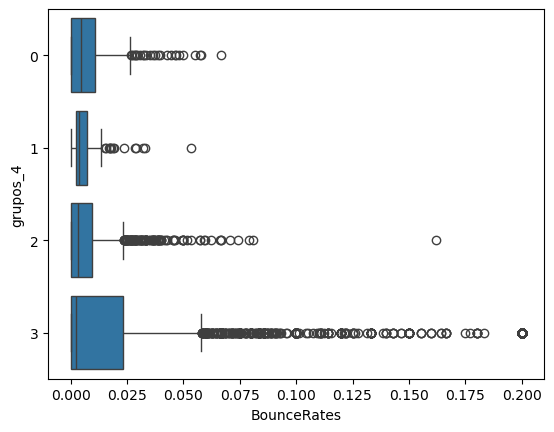

In [78]:
df_padronizado['BounceRates'] = df['BounceRates']
df_padronizado['Revenue'] = df['Revenue']

sns.boxplot(data=df_padronizado, y='grupos_4', x='BounceRates')

In [79]:
pd.crosstab(df_padronizado.Revenue, df_padronizado.grupos_4)

grupos_4,0,1,2,3
Revenue,,,,
False,421,168,1778,8055
True,154,87,523,1144


In [80]:
pd.crosstab(df_padronizado.Revenue, df_padronizado.grupos_4, normalize = 'columns')

grupos_4,0,1,2,3
Revenue,,,,
False,0.732174,0.658824,0.772708,0.875639
True,0.267826,0.341176,0.227292,0.124361


De acordo com as informações geradas, provavelmente o grupo 1 (pref_products), tem a chance de ser o que possui clientes mais propensos à compra, devido a sua baixa taxa de rejeição de visitas (BounceRates) e maior taxa de compras (Revenue).